rolling beta, rolling p-value , rolling R2, rolling beta, show the residual plot.

Easy as.

In [32]:
from helper import get_polygon_data, get_rolling_beta, get_rolling_stats, get_heatmap, plot_residuals, plot_regression_analysis
from helper import get_percentiles
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [33]:
ticker = "AAPL"
bench_ticker = "SPY"

ticker_prices = get_polygon_data(ticker)[["close", "timestamp"]]
bench_prices = get_polygon_data(bench_ticker)[["close"]]
ticker_prices["pct_change"] = ticker_prices["close"].pct_change()
ticker_prices.columns = ["ticker_close", "date", "ticker_pct"]
bench_prices["pct_change"] = bench_prices["close"].pct_change()
bench_prices.columns = ["bench_close", "bench_pct"]
ticker_prices["date"] = pd.to_datetime(ticker_prices["date"], unit = "ms")




In [34]:
get_rolling_beta(ticker_prices, bench_prices, 60)


1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
          ...   
2789    0.639735
2790    0.644809
2791    0.609802
2792    0.611947
2793    0.660509
Length: 2793, dtype: float64

In [35]:
stats = get_rolling_stats(ticker_prices, bench_prices, 60)


In [36]:
plot_data = pd.concat([ticker_prices, bench_prices, stats], axis = 1).dropna()
plot_data["residuals"] = plot_data["ticker_pct"] - (plot_data["beta"] * plot_data["bench_pct"] + plot_data["const"])
plot_data


,ticker_close,date,ticker_pct,bench_close,bench_pct,const,beta,p-value,r-squared,residuals
59,31.5925,2015-03-30 04:00:00,0.025314,208.250,0.012200,0.002341,0.993316,0.000013,0.249768,0.010855
60,31.1075,2015-03-31 04:00:00,-0.015352,206.430,-0.008739,0.002188,1.010722,0.000007,0.258571,-0.008707
61,31.0625,2015-04-01 04:00:00,-0.001447,205.700,-0.003536,0.002408,0.958498,0.000035,0.227943,-0.000465
62,31.3300,2015-04-02 04:00:00,0.008612,206.435,0.003573,0.002332,0.976556,0.000029,0.231374,0.002790
63,31.8375,2015-04-06 04:00:00,0.016199,207.830,0.006758,0.002455,0.989158,0.000030,0.230787,0.007059
...,...,...,...,...,...,...,...,...,...,...
2789,275.9100,2026-02-05 05:00:00,-0.002098,677.620,-0.012489,0.000403,0.639735,0.001318,0.151021,0.005489
2790,278.1200,2026-02-06 05:00:00,0.008010,690.620,0.019185,0.000438,0.644809,0.000941,0.158685,-0.004798
2791,274.6200,2026-02-09 05:00:00,-0.012584,693.950,0.004822,-0.000149,0.609802,0.001521,0.147725,-0.015376
2792,273.6800,2026-02-10 05:00:00,-0.003423,692.120,-0.002637,-0.000066,0.611947,0.001395,0.149716,-0.001743


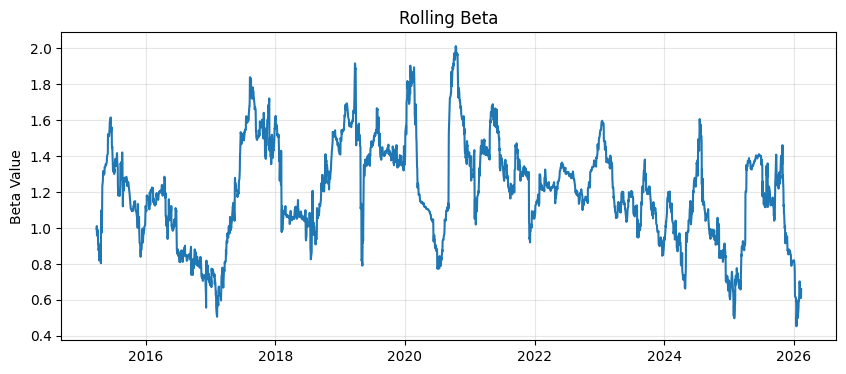

In [37]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data["date"], plot_data['beta'],  label='Rolling Beta')
plt.title('Rolling Beta')
plt.ylabel('Beta Value')
plt.grid(True, alpha=0.3)
plt.show()


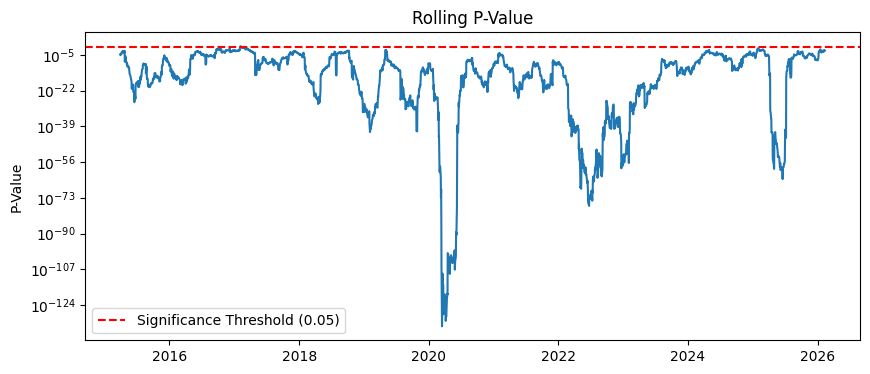

In [38]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data["date"], plot_data['p-value'])
# Significance threshold at 0.05
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.yscale('log') # Useful because p-values can be extremely small
plt.title('Rolling P-Value')
plt.ylabel('P-Value')
plt.legend()
plt.show()


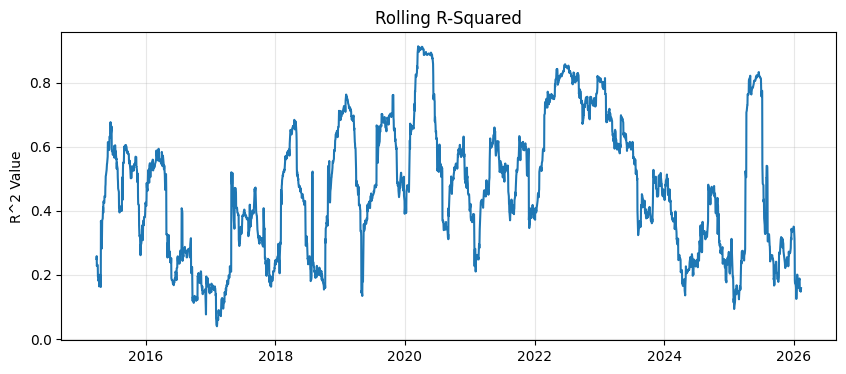

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data["date"], plot_data['r-squared'])
plt.title('Rolling R-Squared')
plt.ylabel('R^2 Value')
plt.grid(True, alpha=0.3)
plt.show()


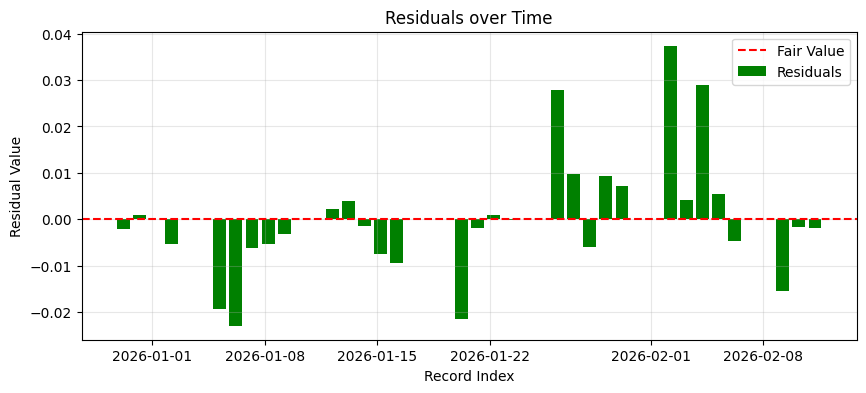

In [40]:
plot_residuals(plot_data.iloc[-30:])




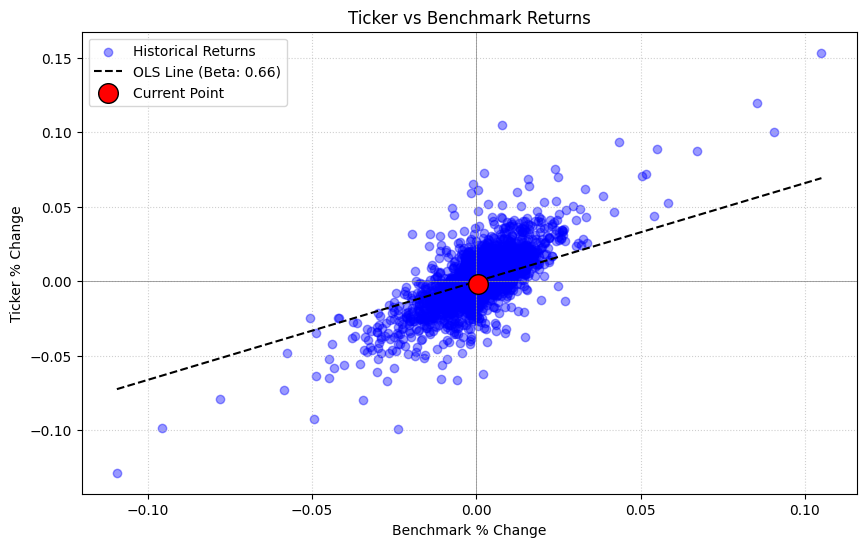

In [41]:
plot_regression_analysis(plot_data)


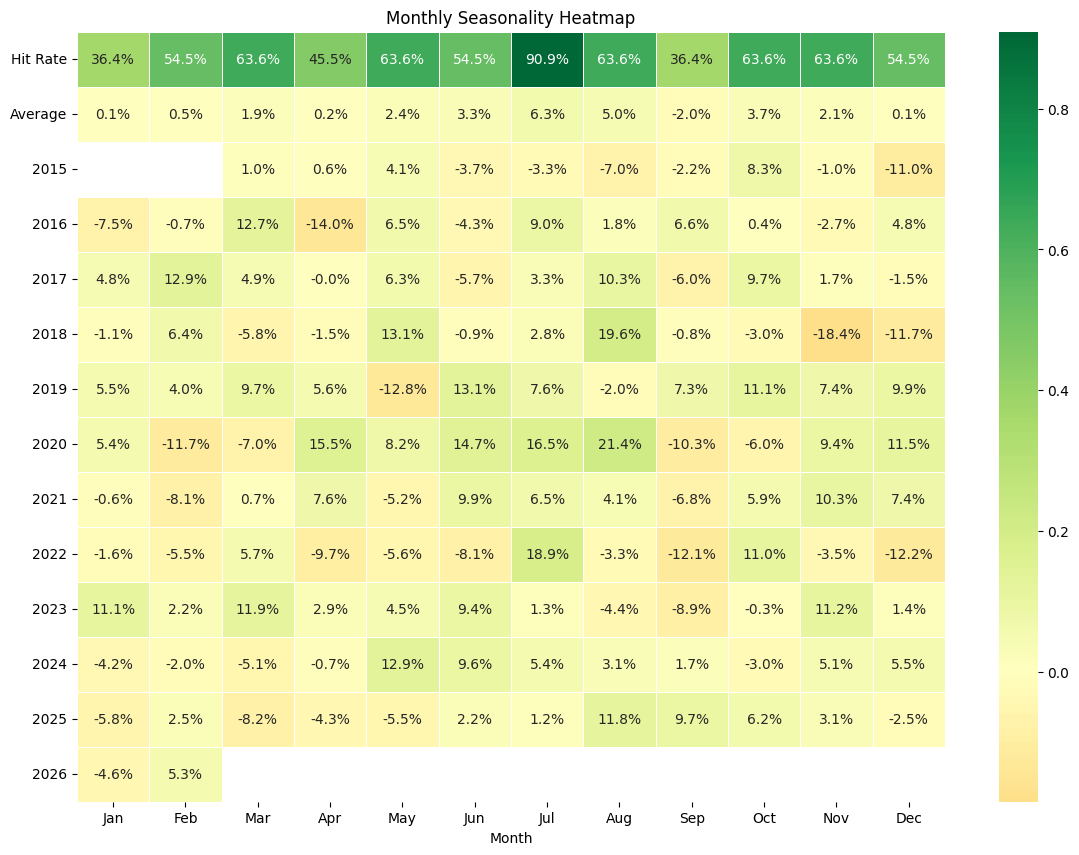

In [42]:
plot_data['Year'] = plot_data['date'].dt.year
plot_data['Month'] = plot_data['date'].dt.month  # Keeps it 1-12 for sorting
get_heatmap(plot_data)


In [43]:
year_data = plot_data[plot_data["Year"] == plot_data["Year"].unique()[-1]]



In [44]:
steps = 252 - year_data.shape[0] # need to generalize this for other asset classes
time_left = (steps)/252
median, tenth_percentile, ninetieth_percentile= get_percentiles(plot_data, year_data, days_left = steps)



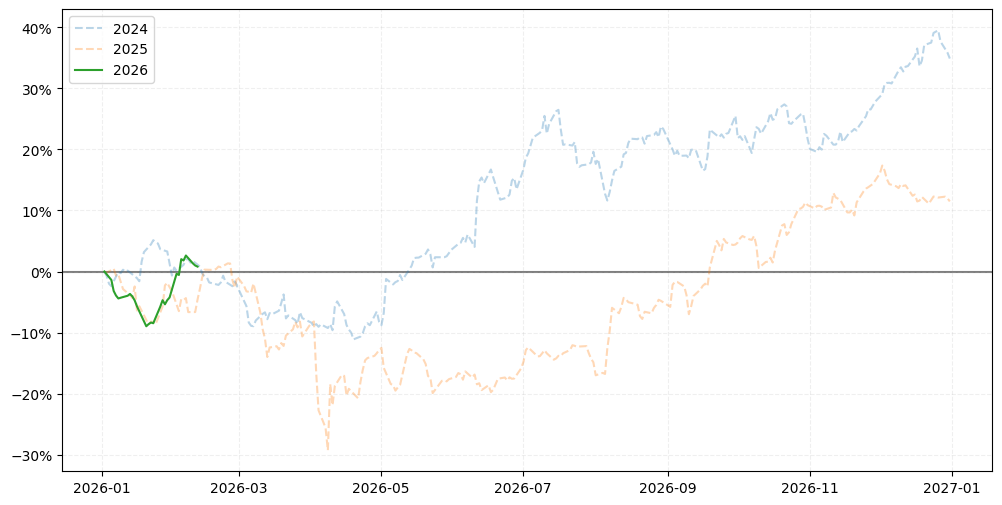

In [45]:
med_price = (pd.concat([year_data["ticker_close"], pd.Series(ninetieth_percentile)]))
plt.figure(figsize = (12, 6))
for i, year in enumerate(plot_data["Year"].unique()[-3:-1]):
    temp = plot_data.copy()[plot_data["Year"] == year]
    temp["date"] = temp["date"] + pd.DateOffset(years = 2 - i)
    plt.plot(temp["date"], (temp["ticker_close"]/(temp.iloc[0]["ticker_close"])) - 1, alpha = 0.3, linestyle = "--", label = year)

plt.plot(year_data["date"], year_data["ticker_close"]/year_data.iloc[0]["ticker_close"] - 1, label = 2026)

plt.axhline(0, color = "black", alpha = 0.5, zorder = -2)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # 1.0 means 0.01 = 1%
plt.grid(True, alpha = 0.2, linestyle = "--", zorder = -3)
plt.legend()
plt.show()


In [59]:
date_input = "25/03/2024"

date_object = datetime.datetime.strptime(date_input, "%d/%m/%Y")
date_object
T_minus = (date_object - pd.DateOffset(days = 10))
T_plus = (date_object + pd.DateOffset(days = 10))

filtered_df = plot_data[plot_data["date"].between(T_minus, T_plus)]


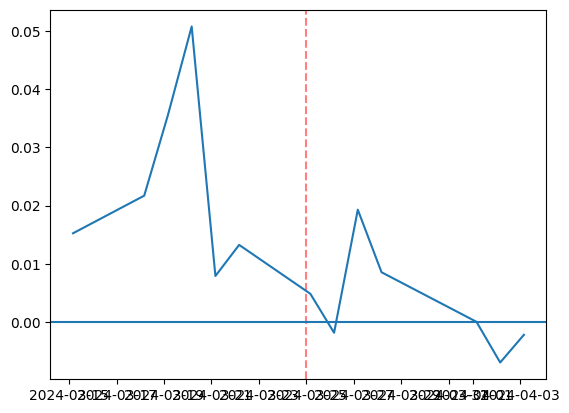

In [81]:
plt.plot(filtered_df["date"], (filtered_df["ticker_close"]/filtered_df["ticker_close"].iloc[10])-1)
plt.axvline(x = date_object, color = "red", alpha = 0.5, zorder = -1, linestyle = "--")
plt.axhline(0)
plt.show()


In [79]:
filtered_df[filtered_df["date"] == date_object]


,ticker_close,date,ticker_pct,bench_close,bench_pct,const,beta,p-value,r-squared,residuals,Year,Month


Timestamp('2024-03-15 00:00:00')